In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
from google.colab import files
uploaded = files.upload()

Saving sms_data.csv to sms_data.csv


In [3]:
import io
df = pd.read_csv(io.BytesIO(uploaded['sms_data.csv']),encoding='ISO-8859-1')

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
import string
import nltk
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer

from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [7]:
df= df.drop(labels = ["Unnamed: 2", "Unnamed: 3", "Unnamed: 4"], axis = 1)
df.columns = ["class", "sms"]
df.head()

,class,sms
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   class   5572 non-null   object
 1   sms     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
df.describe()

,class,sms
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
df['length'] = df['sms'].apply(len)
df.head()

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


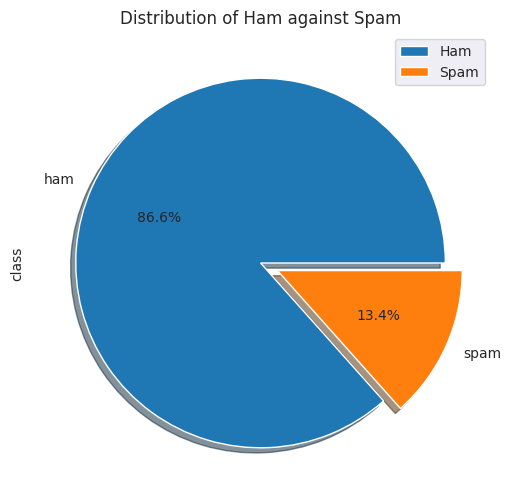

In [11]:
df["class"].value_counts().plot(kind = 'pie',explode=[0, 0.1],figsize=(6, 6),autopct='%1.1f%%',shadow=True)
plt.title("Distribution of Ham against Spam")
plt.legend(["Ham", "Spam"])
plt.show()

In [12]:
def text_preprocess(mess):

    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    nopunc = nopunc.lower()

    # Now just remove any stopwords and non alphabets
    nostop=[word for word in nopunc.split() if word.lower() not in stopwords.words('english') and word.isalpha()]

    return nostop


In [13]:
spam_messages = df[df["class"] == "spam"]["sms"]
ham_messages = df[df["class"] == "ham"]["sms"]
print("No of spam messages : ",len(spam_messages))
print("No of ham messages : ",len(ham_messages))

No of spam messages :  747
No of ham messages :  4825


In [14]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [15]:
spam_words = text_preprocess(spam_messages)

In [16]:
spam_words[:10]

['free', 'entry', 'wkly', 'comp', 'win', 'fa', 'cup', 'final', 'tkts', 'may']

In [17]:
print("Top 10 Spam words are :\n")
print(pd.Series(spam_words).value_counts().head(10))

Top 10 Spam words are :

call      331
free      146
txt       136
ur        129
mobile    108
text      107
claim     105
u          98
reply      98
stop       78
dtype: int64


In [18]:
ham_words = text_preprocess(ham_messages)

In [19]:
ham_words[:10]

['go',
 'jurong',
 'available',
 'bugis',
 'n',
 'great',
 'world',
 'la',
 'e',
 'cine']

In [20]:
print("Top 10 Ham words are :\n")
print(pd.Series(ham_words).value_counts().head(10))

Top 10 Ham words are :

u        820
get      287
ur       235
go       231
got      216
like     215
know     202
come     201
call     200
going    151
dtype: int64


In [21]:
df.head()

,class,sms,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
df["sms"]=df["sms"].apply(text_preprocess)

In [23]:
df["sms"] = df["sms"].agg(lambda x: ' '.join(map(str, x)))

In [24]:
df.head()

,class,sms,length
0,ham,go jurong point crazy available bugis n great ...,111
1,ham,ok lar joking wif u oni,29
2,spam,free entry wkly comp win fa cup final tkts may...,155
3,ham,u dun say early hor u c already say,49
4,ham,nah dont think goes usf lives around though,61


In [25]:
vectorizer = CountVectorizer()
bt = vectorizer.fit(df['sms'])

print("20 Bag of Words (BOW) Features: \n")
print(vectorizer.get_feature_names_out()[10:30])

print("\nTotal number of vocab words : ",len(vectorizer.vocabulary_))

20 Bag of Words (BOW) Features: 

['abel' 'aberdeen' 'abi' 'ability' 'abiola' 'abj' 'able' 'abnormally'
 'aboutas' 'abroad' 'absence' 'absolutely' 'abstract' 'abt' 'abta' 'aburo'
 'abuse' 'abusers' 'ac' 'academic']

Total number of vocab words :  8084


In [26]:
messages_bow = bt.transform(df['sms'])

In [27]:
print('Shape of Sparse Matrix: ', messages_bow.shape)


Shape of Sparse Matrix:  (5572, 8084)


In [28]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)

In [29]:
messages_tfidf = tfidf_transformer.transform(messages_bow)
print(messages_tfidf.shape)

(5572, 8084)


In [30]:
from sklearn.feature_extraction.text import TfidfVectorizer

vec = TfidfVectorizer(encoding = "latin-1", strip_accents = "unicode", stop_words = "english")
features = vec.fit_transform(df["sms"])
print(features.shape)


(5572, 7927)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(messages_tfidf, df['class'], test_size=0.2)

In [32]:
print("train dataset features size : ",x_train.shape)
print("train dataset label size", y_train.shape)

print("\n")

print("test dataset features size", x_test.shape)
print("test dataset lable size", y_test.shape)

train dataset features size :  (4457, 8084)
train dataset label size (4457,)


test dataset features size (1115, 8084)
test dataset lable size (1115,)


In [33]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
clf1 = MultinomialNB()
clf2 = KNeighborsClassifier()
clf3 = DecisionTreeClassifier()
clf4 = SVC(kernel='linear', random_state=0)

In [34]:
model1 = clf1.fit(x_train, y_train)
model2 = clf2.fit(x_train, y_train)
model3 = clf3.fit(x_train, y_train)
model4 = clf4.fit(x_train, y_train)

In [35]:
pred1 = model1.predict(x_train)
pred2 = model2.predict(x_train)
pred3 = model3.predict(x_train)
pred4 = model4.predict(x_train)

In [37]:
print("Accuracy of Train dataset using Naive Bayes Classifier: {0:0.3f}".format(metrics.accuracy_score(y_train, pred1)))
print("Accuracy of Train dataset using K Neighbors Classifier : {0:0.3f}".format(metrics.accuracy_score(y_train, pred2)))
print("Accuracy of Train dataset using Decision Tree Classifier: {0:0.3f}".format(metrics.accuracy_score(y_train, pred3)))
print("Accuracy of Train dataset using Support Vector Machine Classifier: {0:0.3f}".format(metrics.accuracy_score(y_train, pred4)))

Accuracy of Train dataset using Naive Bayes Classifier: 0.976
Accuracy of Train dataset using K Neighbors Classifier : 0.927
Accuracy of Train dataset using Decision Tree Classifier: 1.000
Accuracy of Train dataset using Support Vector Machine Classifier: 0.994


In [38]:
predict1 = model1.predict(x_test)
predict2 = model2.predict(x_test)
predict3 = model3.predict(x_test)
predict4 = model4.predict(x_test)

In [39]:
print("Accuracy of the model using Naive Bayes Classifier: {0:0.3f}".format(metrics.accuracy_score(y_test, predict1)))
print("Accuracy of the model using K Neighbors Classifier : {0:0.3f}".format(metrics.accuracy_score(y_test, predict2)))
print("Accuracy of the model using Decision Tree Classifier: {0:0.3f}".format(metrics.accuracy_score(y_test, predict3)))
print("Accuracy of the model using Support Vector Machine Classifier: {0:0.3f}".format(metrics.accuracy_score(y_test, predict4)))

Accuracy of the model using Naive Bayes Classifier: 0.960
Accuracy of the model using K Neighbors Classifier : 0.921
Accuracy of the model using Decision Tree Classifier: 0.961
Accuracy of the model using Support Vector Machine Classifier: 0.981


In [40]:
#BECAUSE SVM GAVE THE HIGHEST ACCURACY
#WE CALCULATE THE CONFUSION MATRIX AND CLASSIFICATION REPORT FOR SVM CLASSIFIER
print(metrics.classification_report(y_test, predict4))
print(metrics.confusion_matrix(y_test, predict4))

              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       971
        spam       0.98      0.87      0.92       144

    accuracy                           0.98      1115
   macro avg       0.98      0.93      0.96      1115
weighted avg       0.98      0.98      0.98      1115

[[969   2]
 [ 19 125]]
